In [11]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data.faces.faces_data import get_faces_dataset
import common_grid_search_analysis

import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.model_selection import ShuffleSplit

PLOT_PREFIX = "Figures/FACES_SVM_PLOT_"
GLOBAL_FIG_COUNTER = 0

GS_FILE_NAME_PREFIX = "Analysis_Data/FACES_SVM_DATA"

In [2]:
X_train, X_test, y_train, y_test = get_faces_dataset()
num_features = X_train.shape[1]


In [3]:
import TrainingCurves

train_sizes, train_scores, test_scores, fit_times = TrainingCurves.perform_learning_curve(svm.SVC(), X_train, y_train, "accuracy")


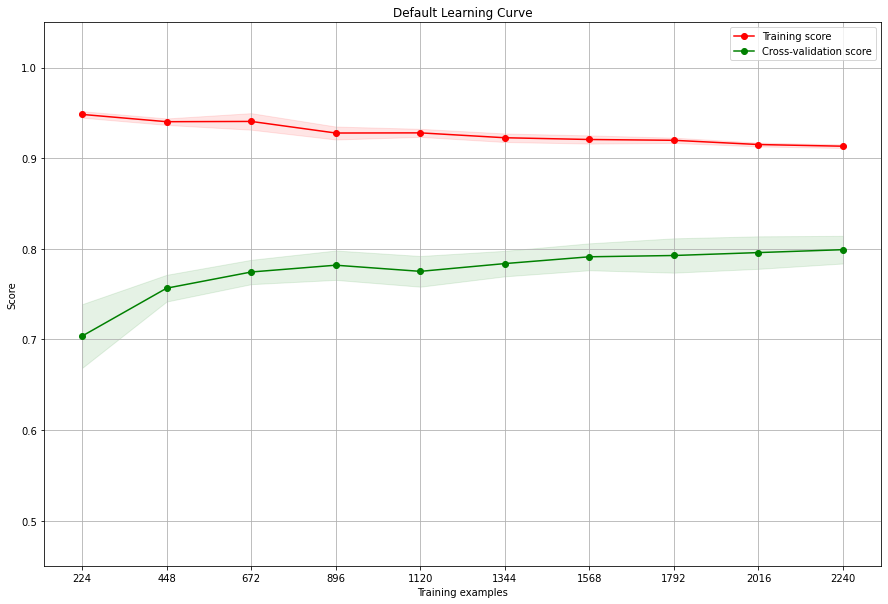

In [4]:
ylim=(0.45, 1.05)
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, "Default Learning Curve", ylim=ylim)


In [5]:
import SVMs.common_SVM as common_SVM

C = [i for i in range(1, 15)]
gamma = [i for i in range(1, 10)]
C = [.1, .5, 1, 5, 10]
gamma = [1, 0.1, 0.01, 0.001]
kernel = ["linear", "rbf", "poly"]
degree = [3, 4]
parameters = {"kernel": kernel, 'C': C, 'gamma': gamma}

gs = common_SVM.perform_grid_search(parameters, X_train, y_train, scoring='accuracy', GS_FILE_NAME_PREFIX=GS_FILE_NAME_PREFIX)

gs_results = gs

NOT performing Grid Search


Plot saved as:  Figures/FACES_SVM_PLOT_GS_ModelComplexity_C_gamma_kernel.png


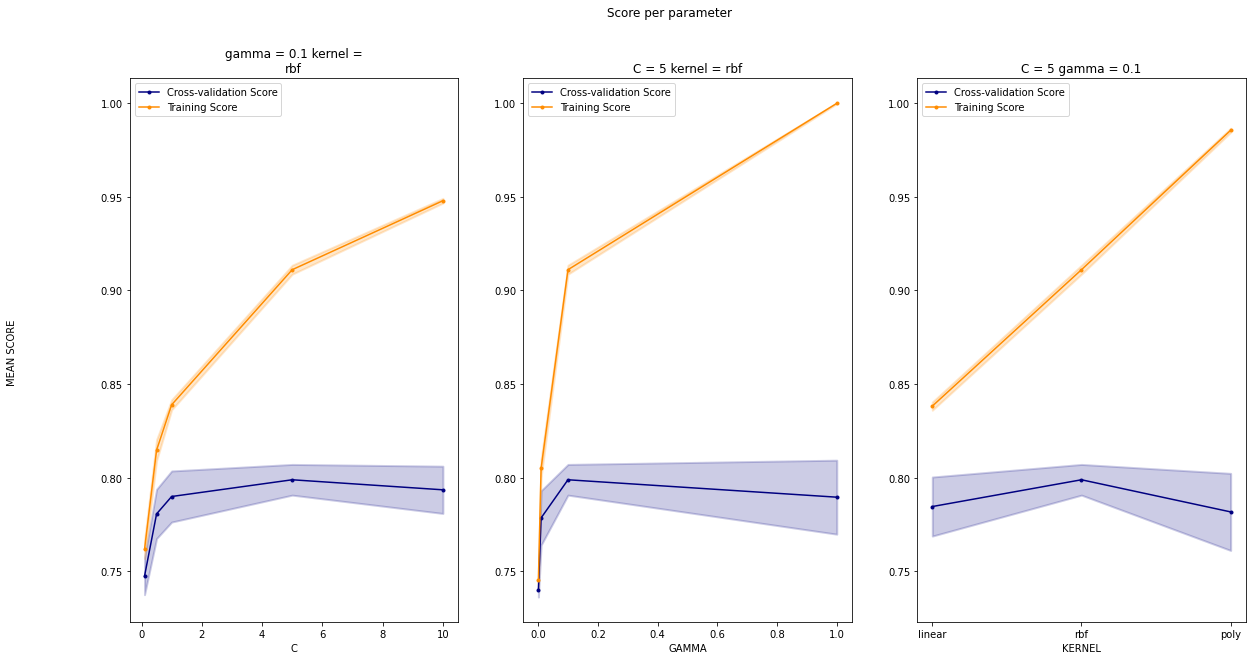

In [7]:
unused_params_values = {'gamma': 1, 'C': 1}
common_grid_search_analysis.plot_grid_search_model_complexity(gs_results, PLOT_PREFIX)

Plot saved as:  Figures/FACES_SVM_PLOT_GS_Times_C_gamma_kernel.png


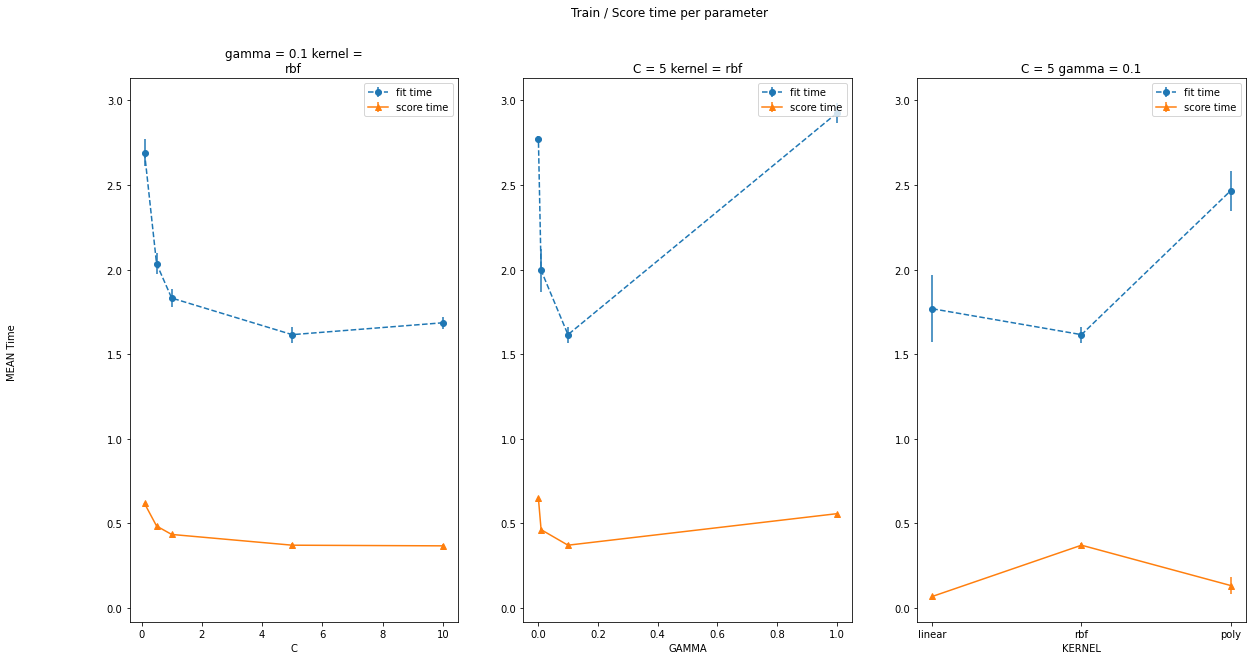

In [9]:
common_grid_search_analysis.plot_grid_search_training_times(gs_results, PLOT_PREFIX)

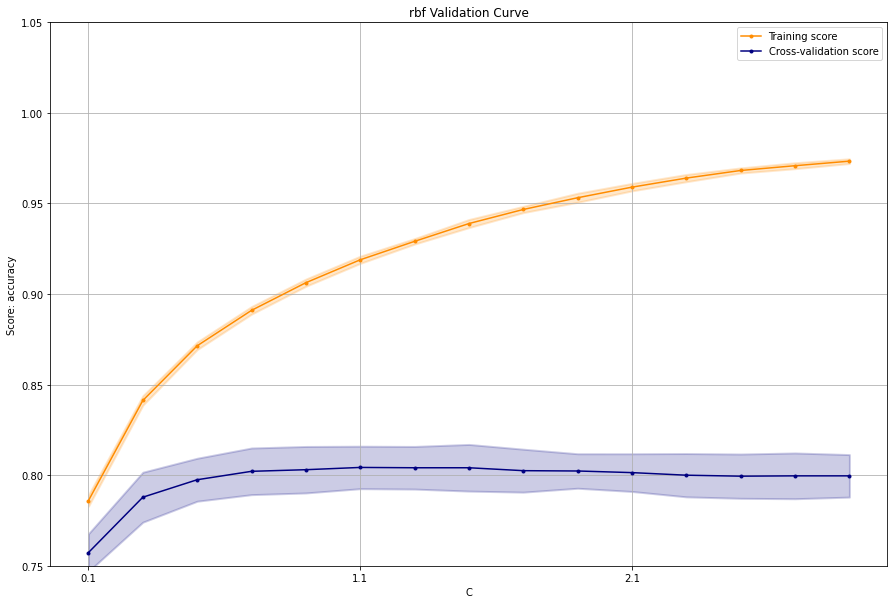

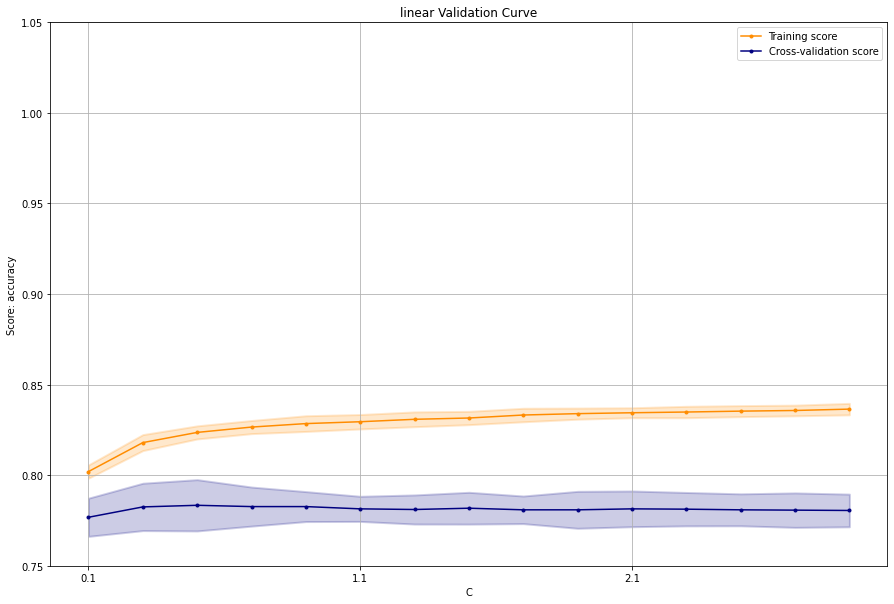

In [17]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
ylim=(0.75, 1.05)

C = [i for i in np.arange(0.1, 3, 0.2)]
gamma = [i for i in np.arange(0.1, 2, 0.1)]

estimator = svm.SVC(kernel='rbf')

TrainingCurves.plot_validation_curve(estimator, X_train, y_train, "C", C, "rbf Validation Curve", scoring="accuracy", cv=cv, ylim=ylim)

estimator = svm.SVC(kernel='linear')

TrainingCurves.plot_validation_curve(estimator, X_train, y_train, "C", C, "linear Validation Curve", scoring="accuracy", cv=cv, ylim=ylim)


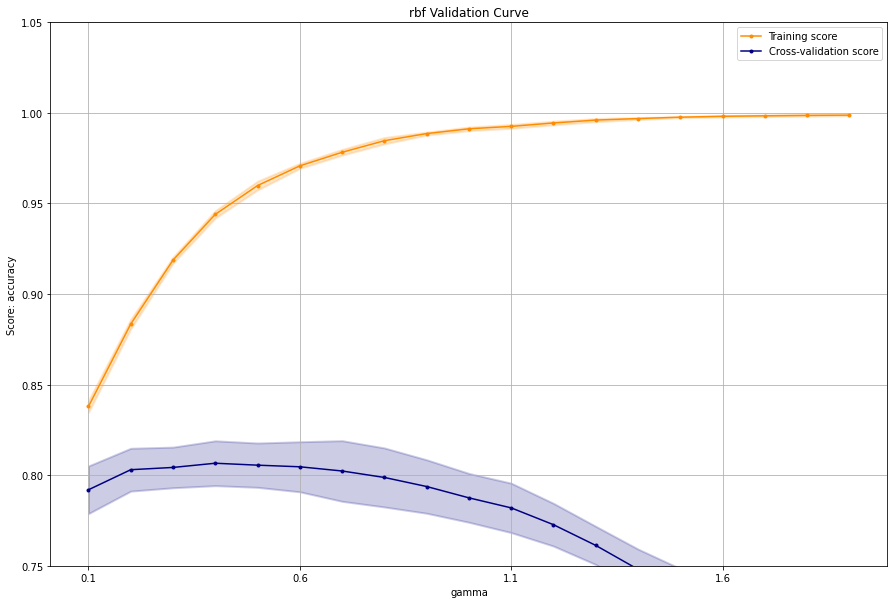

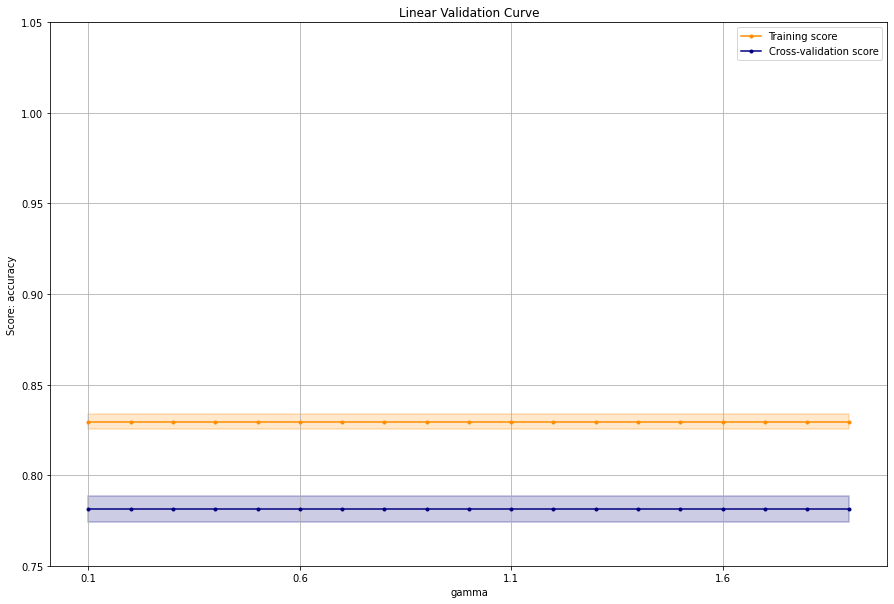

In [18]:
estimator = svm.SVC(kernel='rbf')
TrainingCurves.plot_validation_curve(estimator, X_train, y_train, "gamma", gamma, "rbf Validation Curve", scoring="accuracy", cv=cv, ylim=ylim)


estimator = svm.SVC(kernel='linear')
TrainingCurves.plot_validation_curve(estimator, X_train, y_train, "gamma", gamma, "Linear Validation Curve", scoring="accuracy", cv=cv, ylim=ylim)


Plot saved as:  Figures/DECISION_TREE_TEST_GridScore_max_depth_min_samples_split_10.png


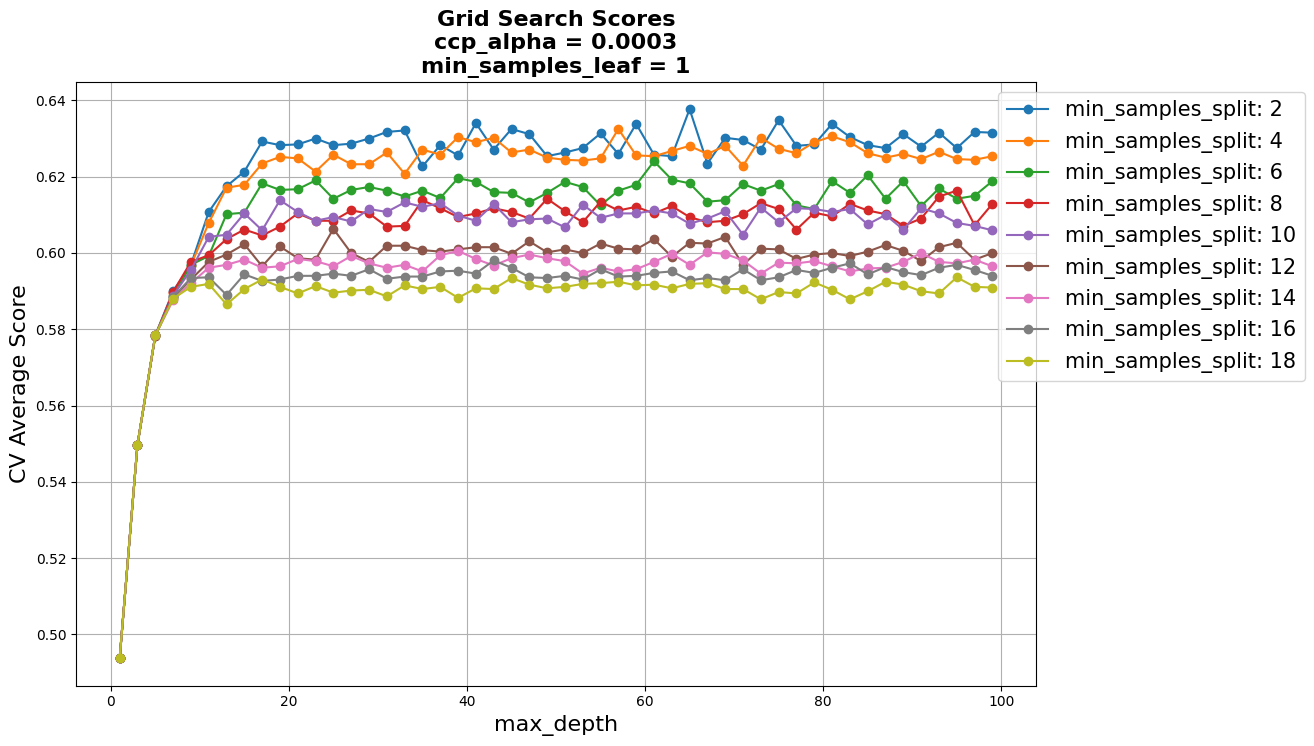

In [23]:
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'C', 'gamma', mean_score_limit, PLOT_PREFIX=PLOT_PREFIX, plot_counter=GLOBAL_FIG_COUNTER)
GLOBAL_FIG_COUNTER+=1

Plot saved as:  Figures/DECISION_TREE_TEST_GridScore_max_depth_min_samples_leaf_11.png


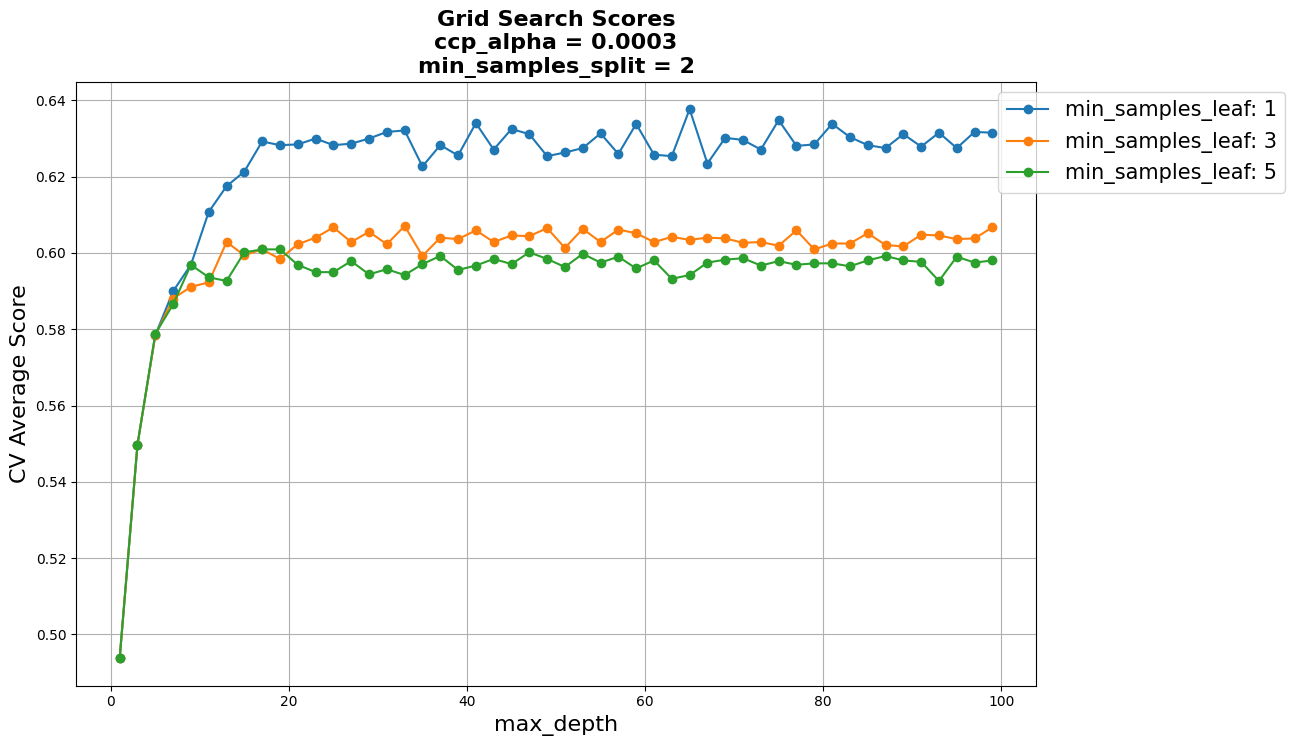

In [24]:
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'kernel', 'C', mean_score_limit, PLOT_PREFIX=PLOT_PREFIX, plot_counter=GLOBAL_FIG_COUNTER)
GLOBAL_FIG_COUNTER+=1